In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image_path = "/content/drive/MyDrive/Visión por computadora/Tareas/Clase_5/cat4.png"
image = cv2.imread(image_path)

K-means (SkLearns)

In [4]:
from sklearn.cluster import KMeans

In [10]:
#Reformatear la imagen para que sea una matriz de píxeles
reshaped_image = image.reshape((-1, 3))  # (-1, 3) para una imagen en color (3 canales)

In [11]:
#Crear el objeto KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

In [12]:
#Aplicar K-means a los píxeles de la imagen
kmeans.fit(reshaped_image)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [13]:
#Obtener los centroides de los clusters y las etiquetas de los píxeles
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [20]:
#Reconstruir la imagen segmentada manteniendo los colores originales
segmented_image = np.zeros_like(image)
for i in range(len(centers)):
    segmented_image[labels == i] = centers[i]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 571 but corresponding boolean dimension is 335748

In [16]:
#Convertir la imagen segmentada a un tipo de datos compatible
segmented_image = np.uint8(segmented_image)

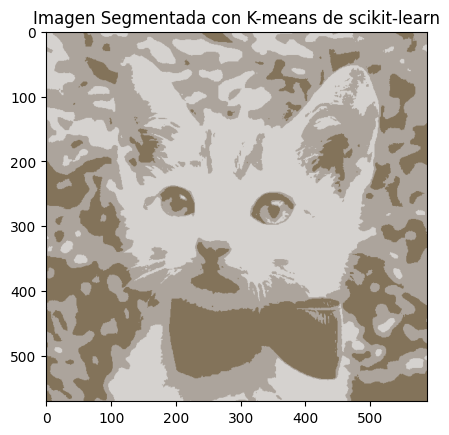

In [19]:
#Visualizar la imagen segmentada
plt.imshow(segmented_image)
plt.title('Imagen Segmentada con K-means de scikit-learn')
plt.show()